In [1]:
!pip install opencv-python pingouin

In [2]:
import utils_analysis

import pingouin as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

seed = 42
AMOUNT_OF_FRAMES = 120
BLENDNAMES = ['_neutral', 'browDownLeft', 'browDownRight', 'browInnerUp', 'browOuterUpLeft', 'browOuterUpRight', 'cheekPuff', 'cheekSquintLeft', 'cheekSquintRight', 'eyeBlinkLeft', 'eyeBlinkRight', 'eyeLookDownLeft', 'eyeLookDownRight', 'eyeLookInLeft', 'eyeLookInRight', 'eyeLookOutLeft', 'eyeLookOutRight', 'eyeLookUpLeft', 'eyeLookUpRight', 'eyeSquintLeft', 'eyeSquintRight', 'eyeWideLeft', 'eyeWideRight', 'jawForward', 'jawLeft', 'jawOpen', 'jawRight', 'mouthClose', 'mouthDimpleLeft', 'mouthDimpleRight', 'mouthFrownLeft', 'mouthFrownRight', 'mouthFunnel', 'mouthLeft', 'mouthLowerDownLeft', 'mouthLowerDownRight', 'mouthPressLeft', 'mouthPressRight', 'mouthPucker', 'mouthRight', 'mouthRollLower', 'mouthRollUpper', 'mouthShrugLower', 'mouthShrugUpper', 'mouthSmileLeft', 'mouthSmileRight', 'mouthStretchLeft', 'mouthStretchRight', 'mouthUpperUpLeft', 'mouthUpperUpRight', 'noseSneerLeft', 'noseSneerRight']

In [3]:
pathToGif = "/project_ghent/Master-Thesis/featureExtraction/output_blendshape"

ids, labels, groups, catgs = utils_analysis.get_input_GIF(pathToGif) 
utils_analysis.split_dataset(ids, labels, groups)

FileNotFoundError: [Errno 2] No such file or directory: '/project_ghent/Master-Thesis/featureExtraction/output_blendshape/Confusion'

In [5]:
train_ds, val_ds = utils_analysis.get_dataset()

Succesfully retrieved at /project_ghent/Master-Thesis/gif/pickled/ with skipframes = 1 []


In [6]:
len(train_ds[0][0][0]), len(train_ds[0][0])

(52, 40)

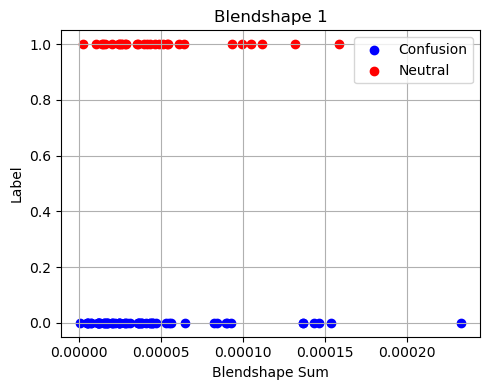

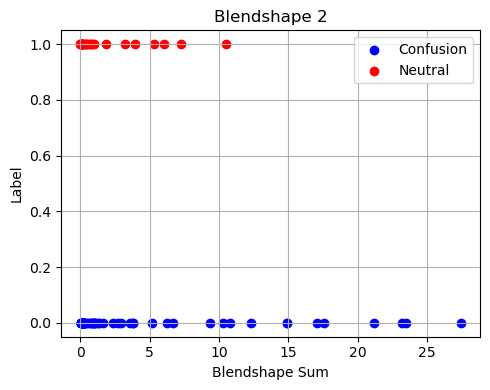

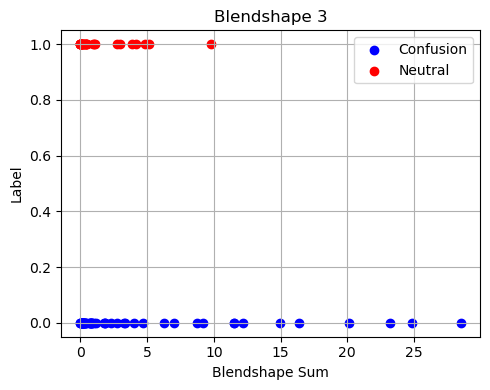

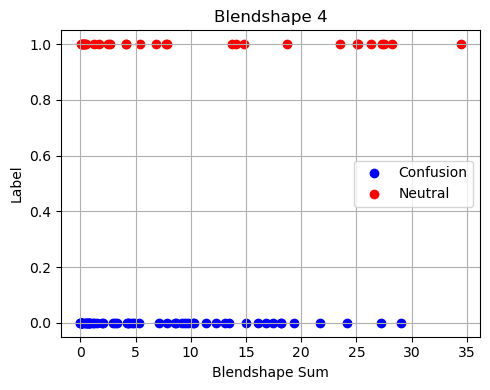

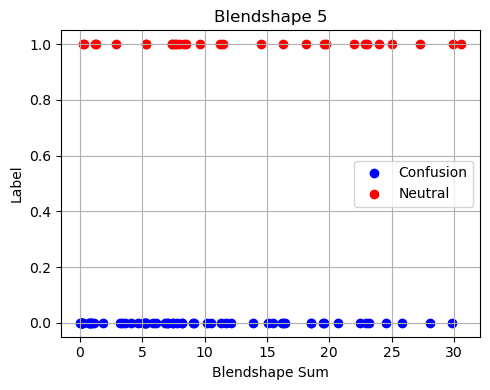

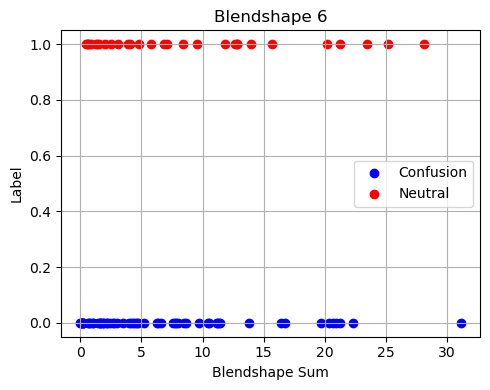

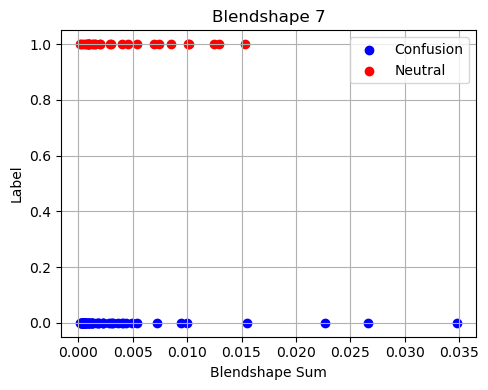

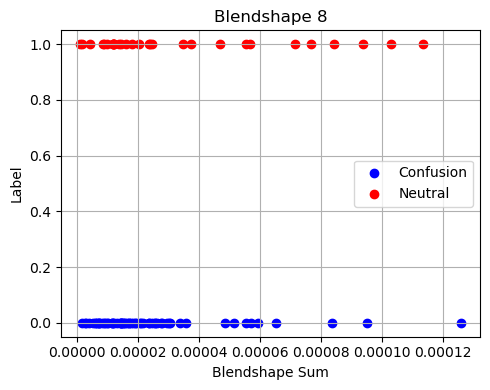

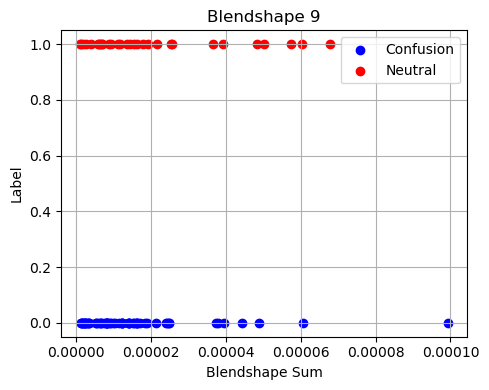

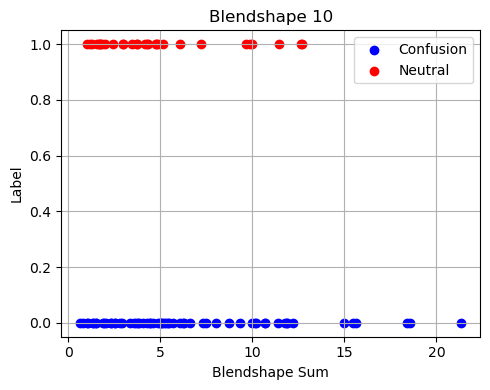

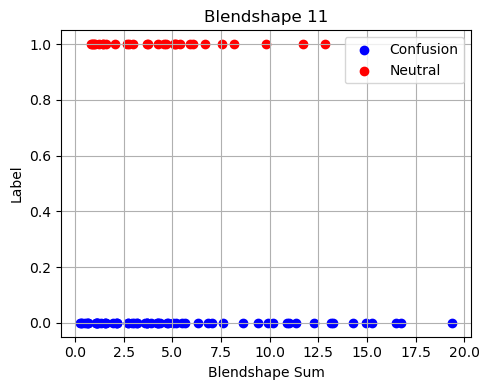

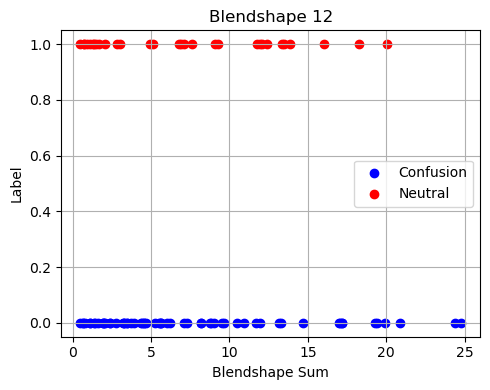

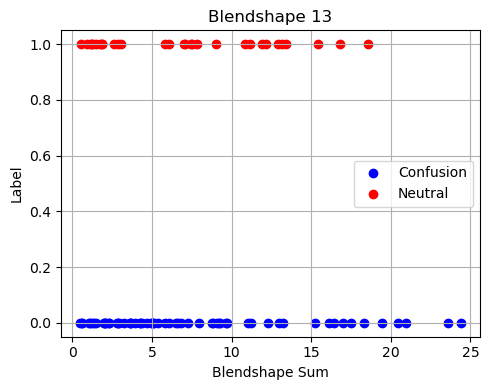

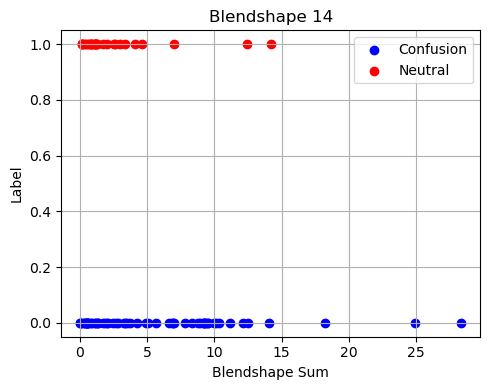

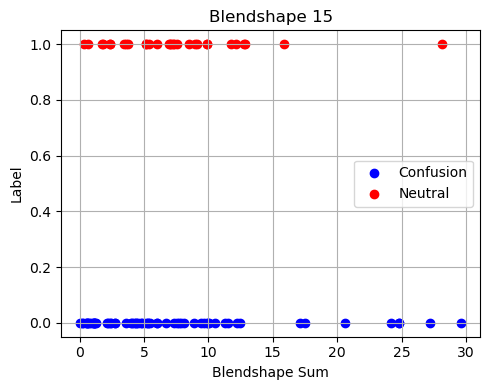

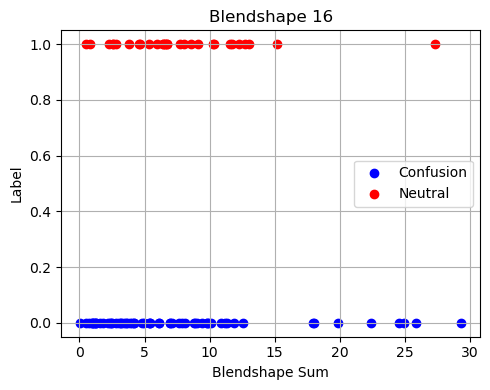

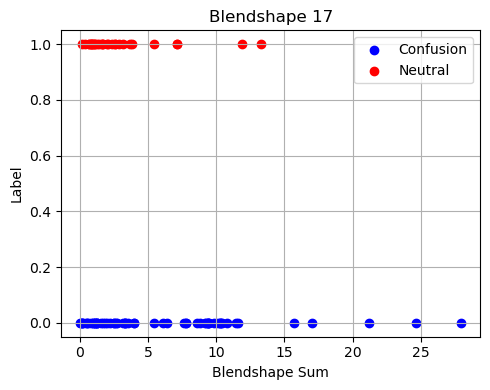

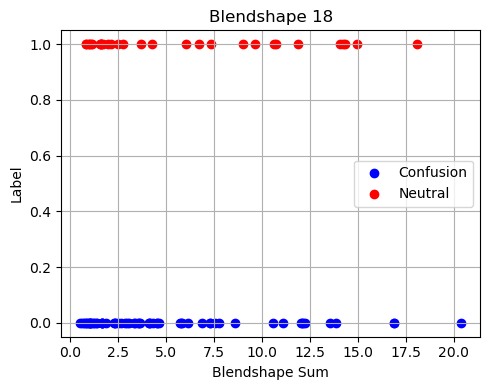

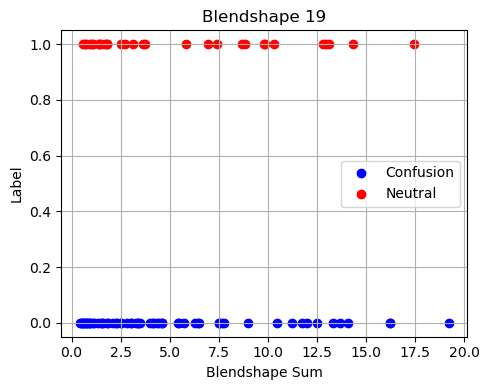

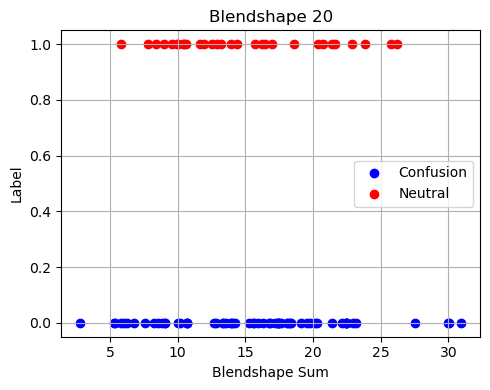

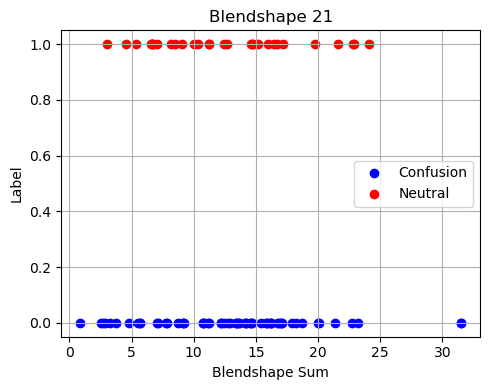

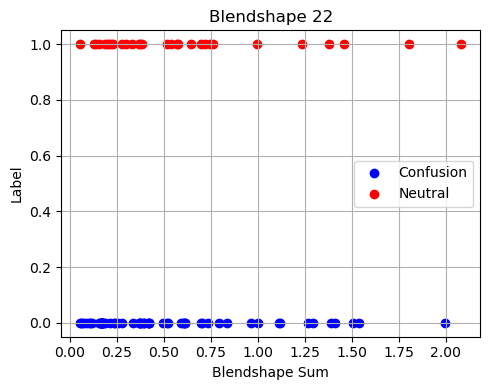

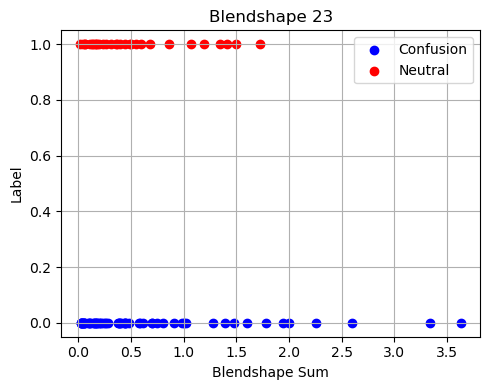

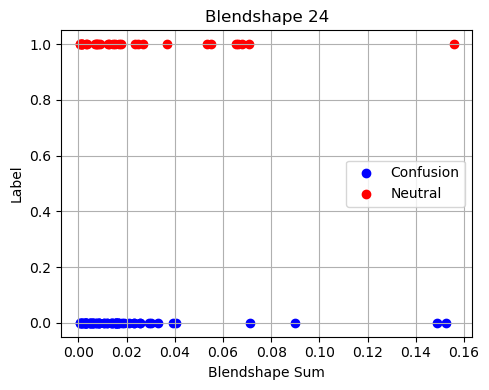

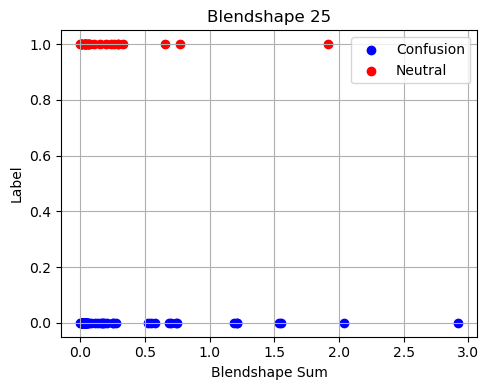

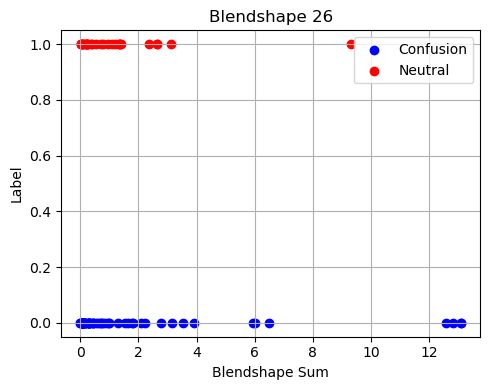

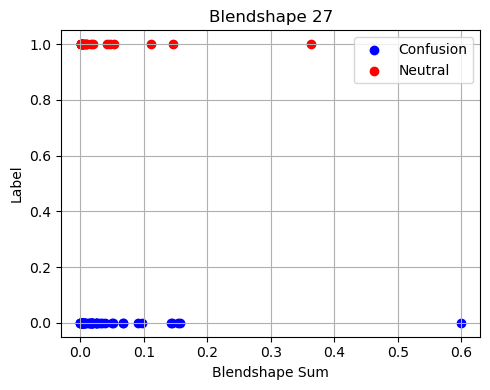

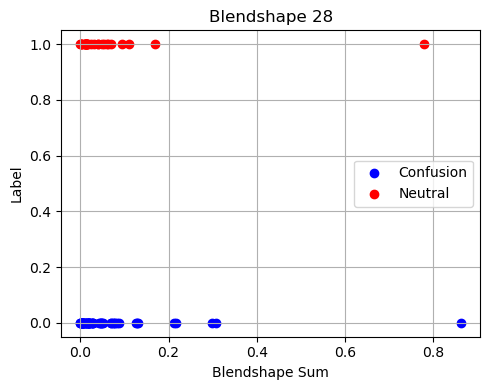

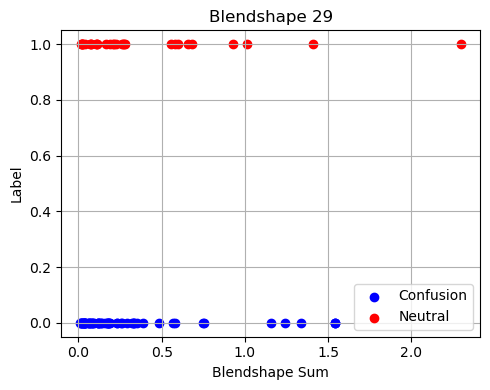

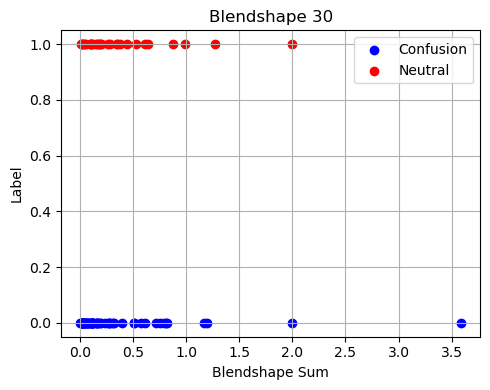

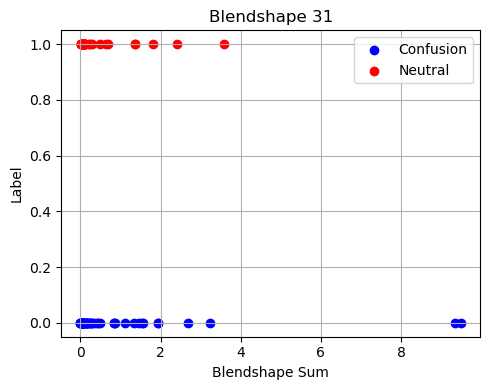

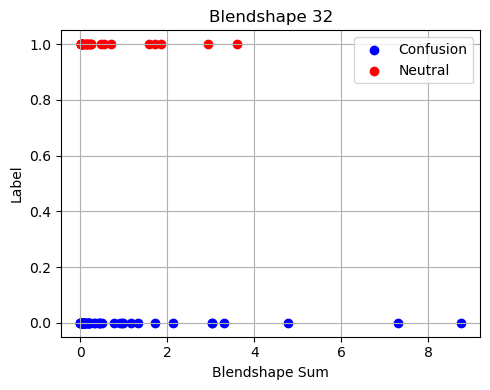

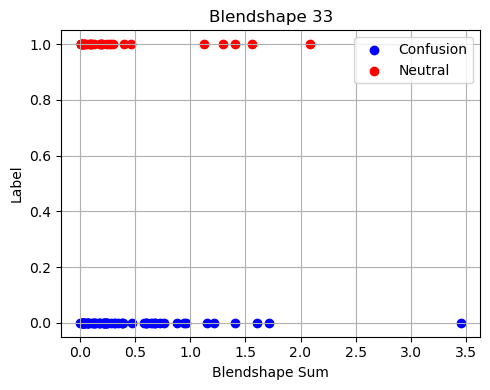

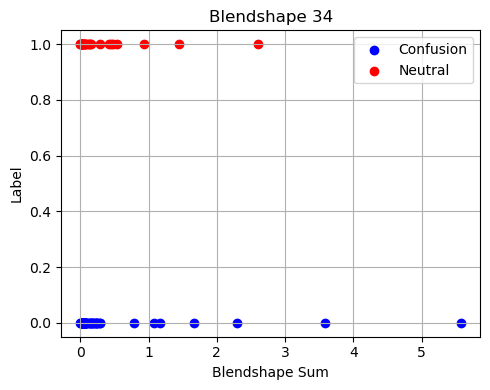

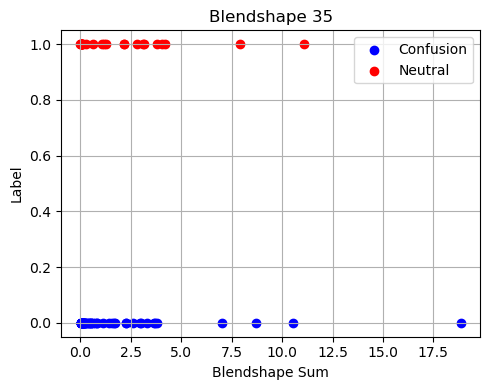

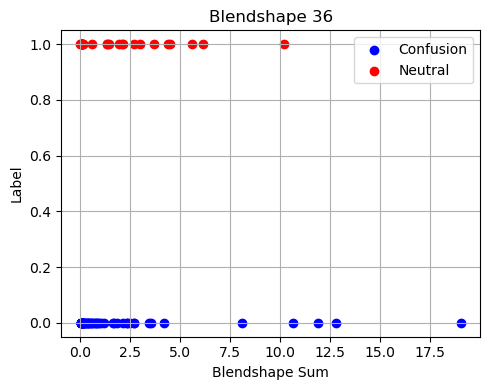

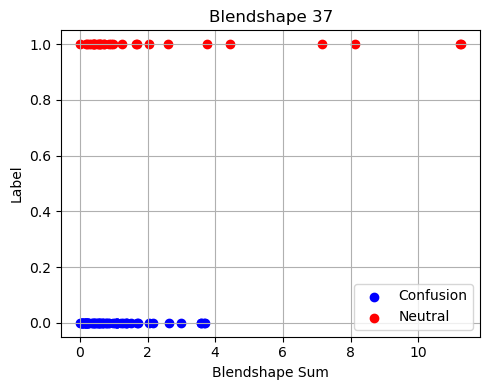

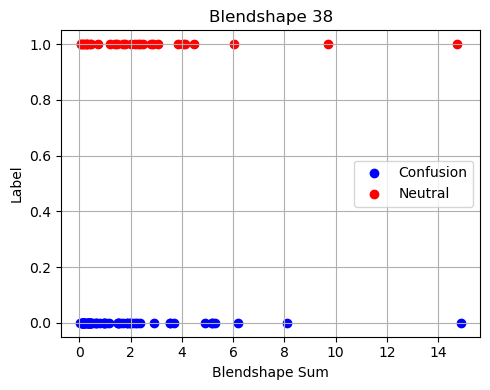

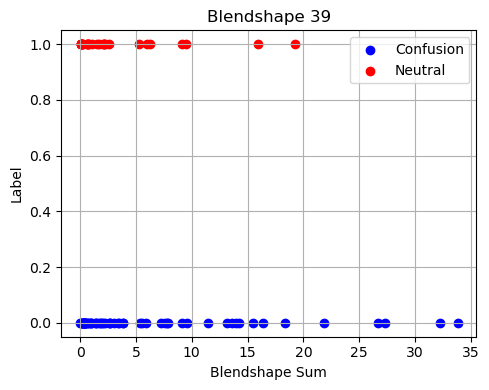

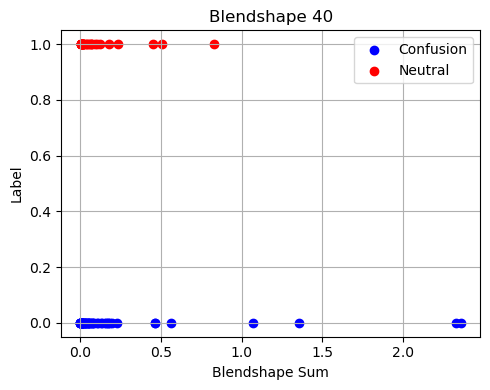

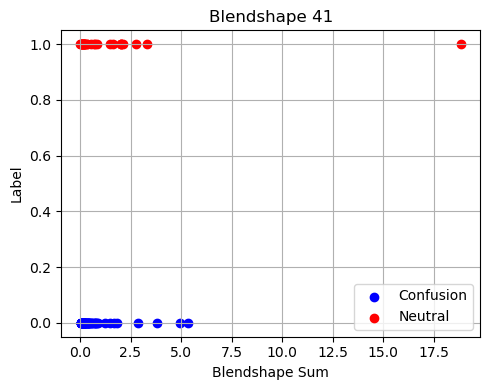

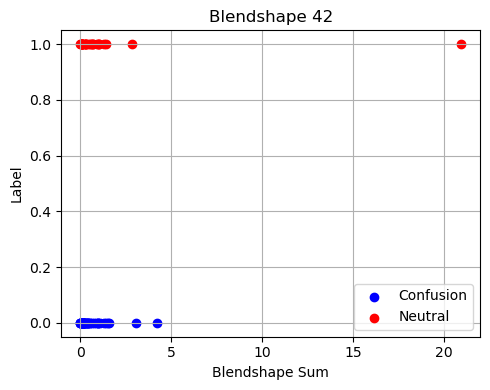

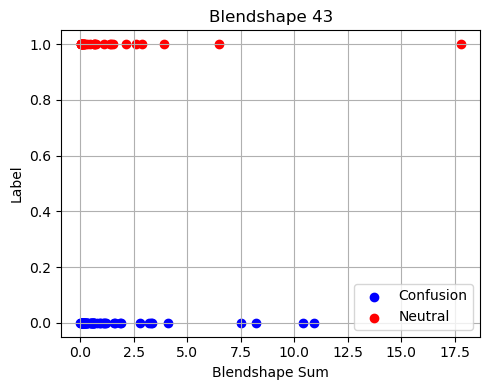

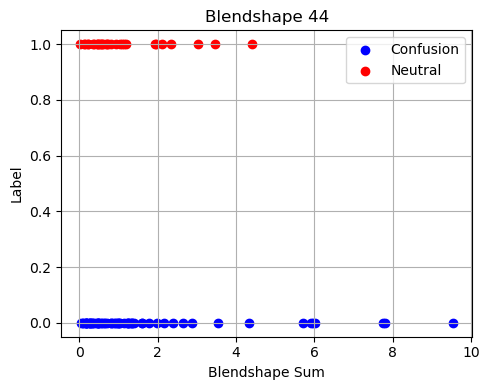

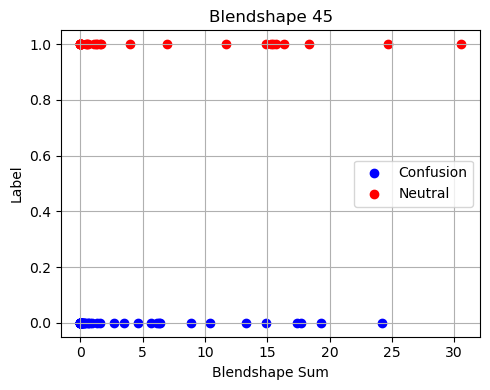

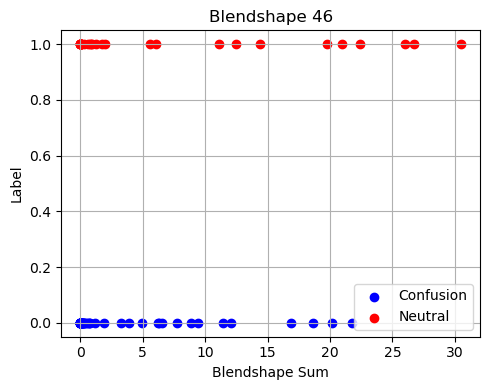

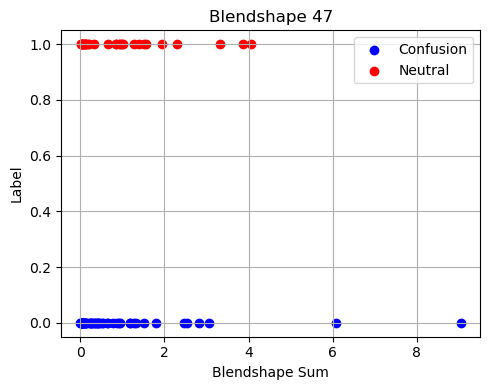

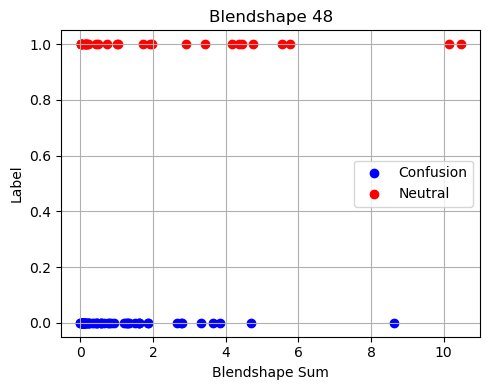

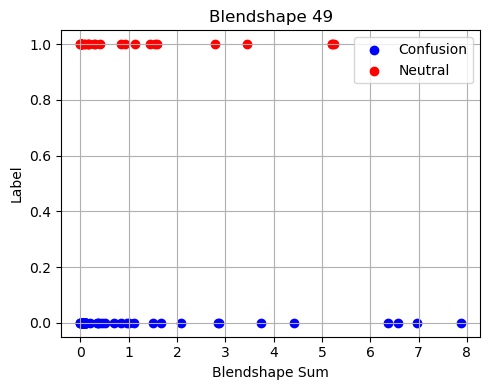

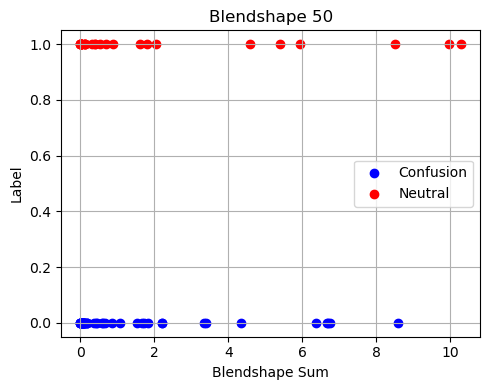

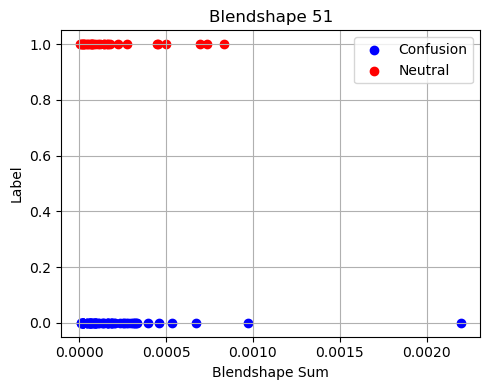

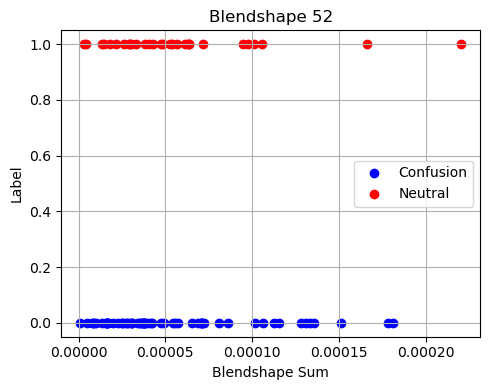

In [48]:
batch_size = 1
num_workers = 4

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, worker_init_fn=np.random.seed(seed), num_workers=num_workers)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers)

for i in range(52):
    plt.figure(figsize=(5, 4))

    blue_points = []
    red_points = []
    
    for input, label in train_dl:
        if label.item() == 0:
            blue_points.append((input.squeeze(0).sum(dim=0)[i].item(), label.item()))
        else:
            red_points.append((input.squeeze(0).sum(dim=0)[i].item(), label.item()))
    
    blue_xs, blue_ys = zip(*blue_points)
    plt.scatter(blue_xs, blue_ys, color='blue', label='Confusion')
    
    red_xs, red_ys = zip(*red_points)
    plt.scatter(red_xs, red_ys, color='red', label='Neutral')
    
    plt.title(f"Blendshape {i + 1}")
    plt.xlabel("Blendshape Sum")
    plt.ylabel("Label")
    plt.grid(True)

    plt.tight_layout()
    plt.legend()
    plt.show()

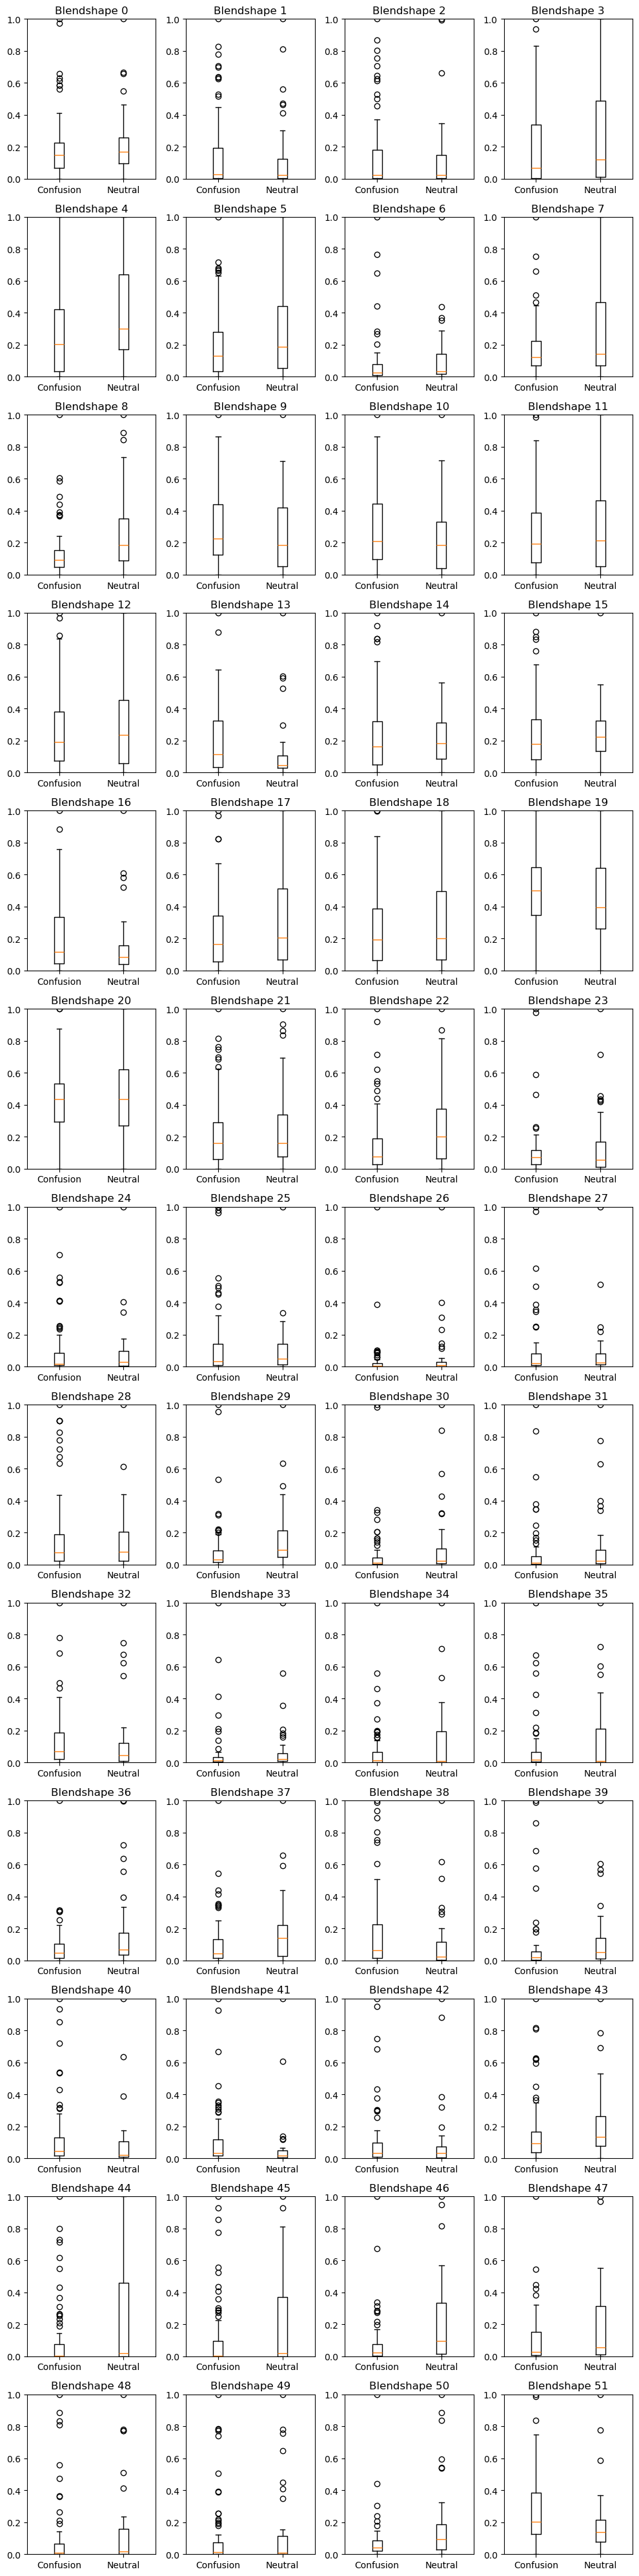

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

batch_size = 1
num_workers = 4

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers)

blendshape_data_0 = [[] for _ in range(52)]
blendshape_data_1 = [[] for _ in range(52)]

for input, label in train_dl:
    for i in range(52):
        if label.item() == 0:
            blendshape_data_0[i].append(input.squeeze(0).mean(dim=0)[i].item())
        elif label.item() == 1:
            blendshape_data_1[i].append(input.squeeze(0).mean(dim=0)[i].item())

for input, label in val_dl:
    for i in range(52):
        if label.item() == 0:
            blendshape_data_0[i].append(input.squeeze(0).mean(dim=0)[i].item())
        elif label.item() == 1:
            blendshape_data_1[i].append(input.squeeze(0).mean(dim=0)[i].item())

# Convert lists to numpy arrays for easier manipulation
blendshape_data_0 = np.array(blendshape_data_0)
blendshape_data_1 = np.array(blendshape_data_1)

for i in range(52):
    min_val_0 = np.min(blendshape_data_0[i])
    max_val_0 = np.max(blendshape_data_0[i])
    blendshape_data_0[i] = (blendshape_data_0[i] - min_val_0) / (max_val_0 - min_val_0)

    min_val_1 = np.min(blendshape_data_1[i])
    max_val_1 = np.max(blendshape_data_1[i])
    blendshape_data_1[i] = (blendshape_data_1[i] - min_val_1) / (max_val_1 - min_val_1)

fig, axs = plt.subplots(13, 4, figsize=(10, 40))
axs = axs.flatten()

for i in range(52):
    data = [blendshape_data_0[i], blendshape_data_1[i]]
    axs[i].boxplot(data, labels=['Confusion', 'Neutral'])
    axs[i].set_title(f"Blendshape {i}")
    axs[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()

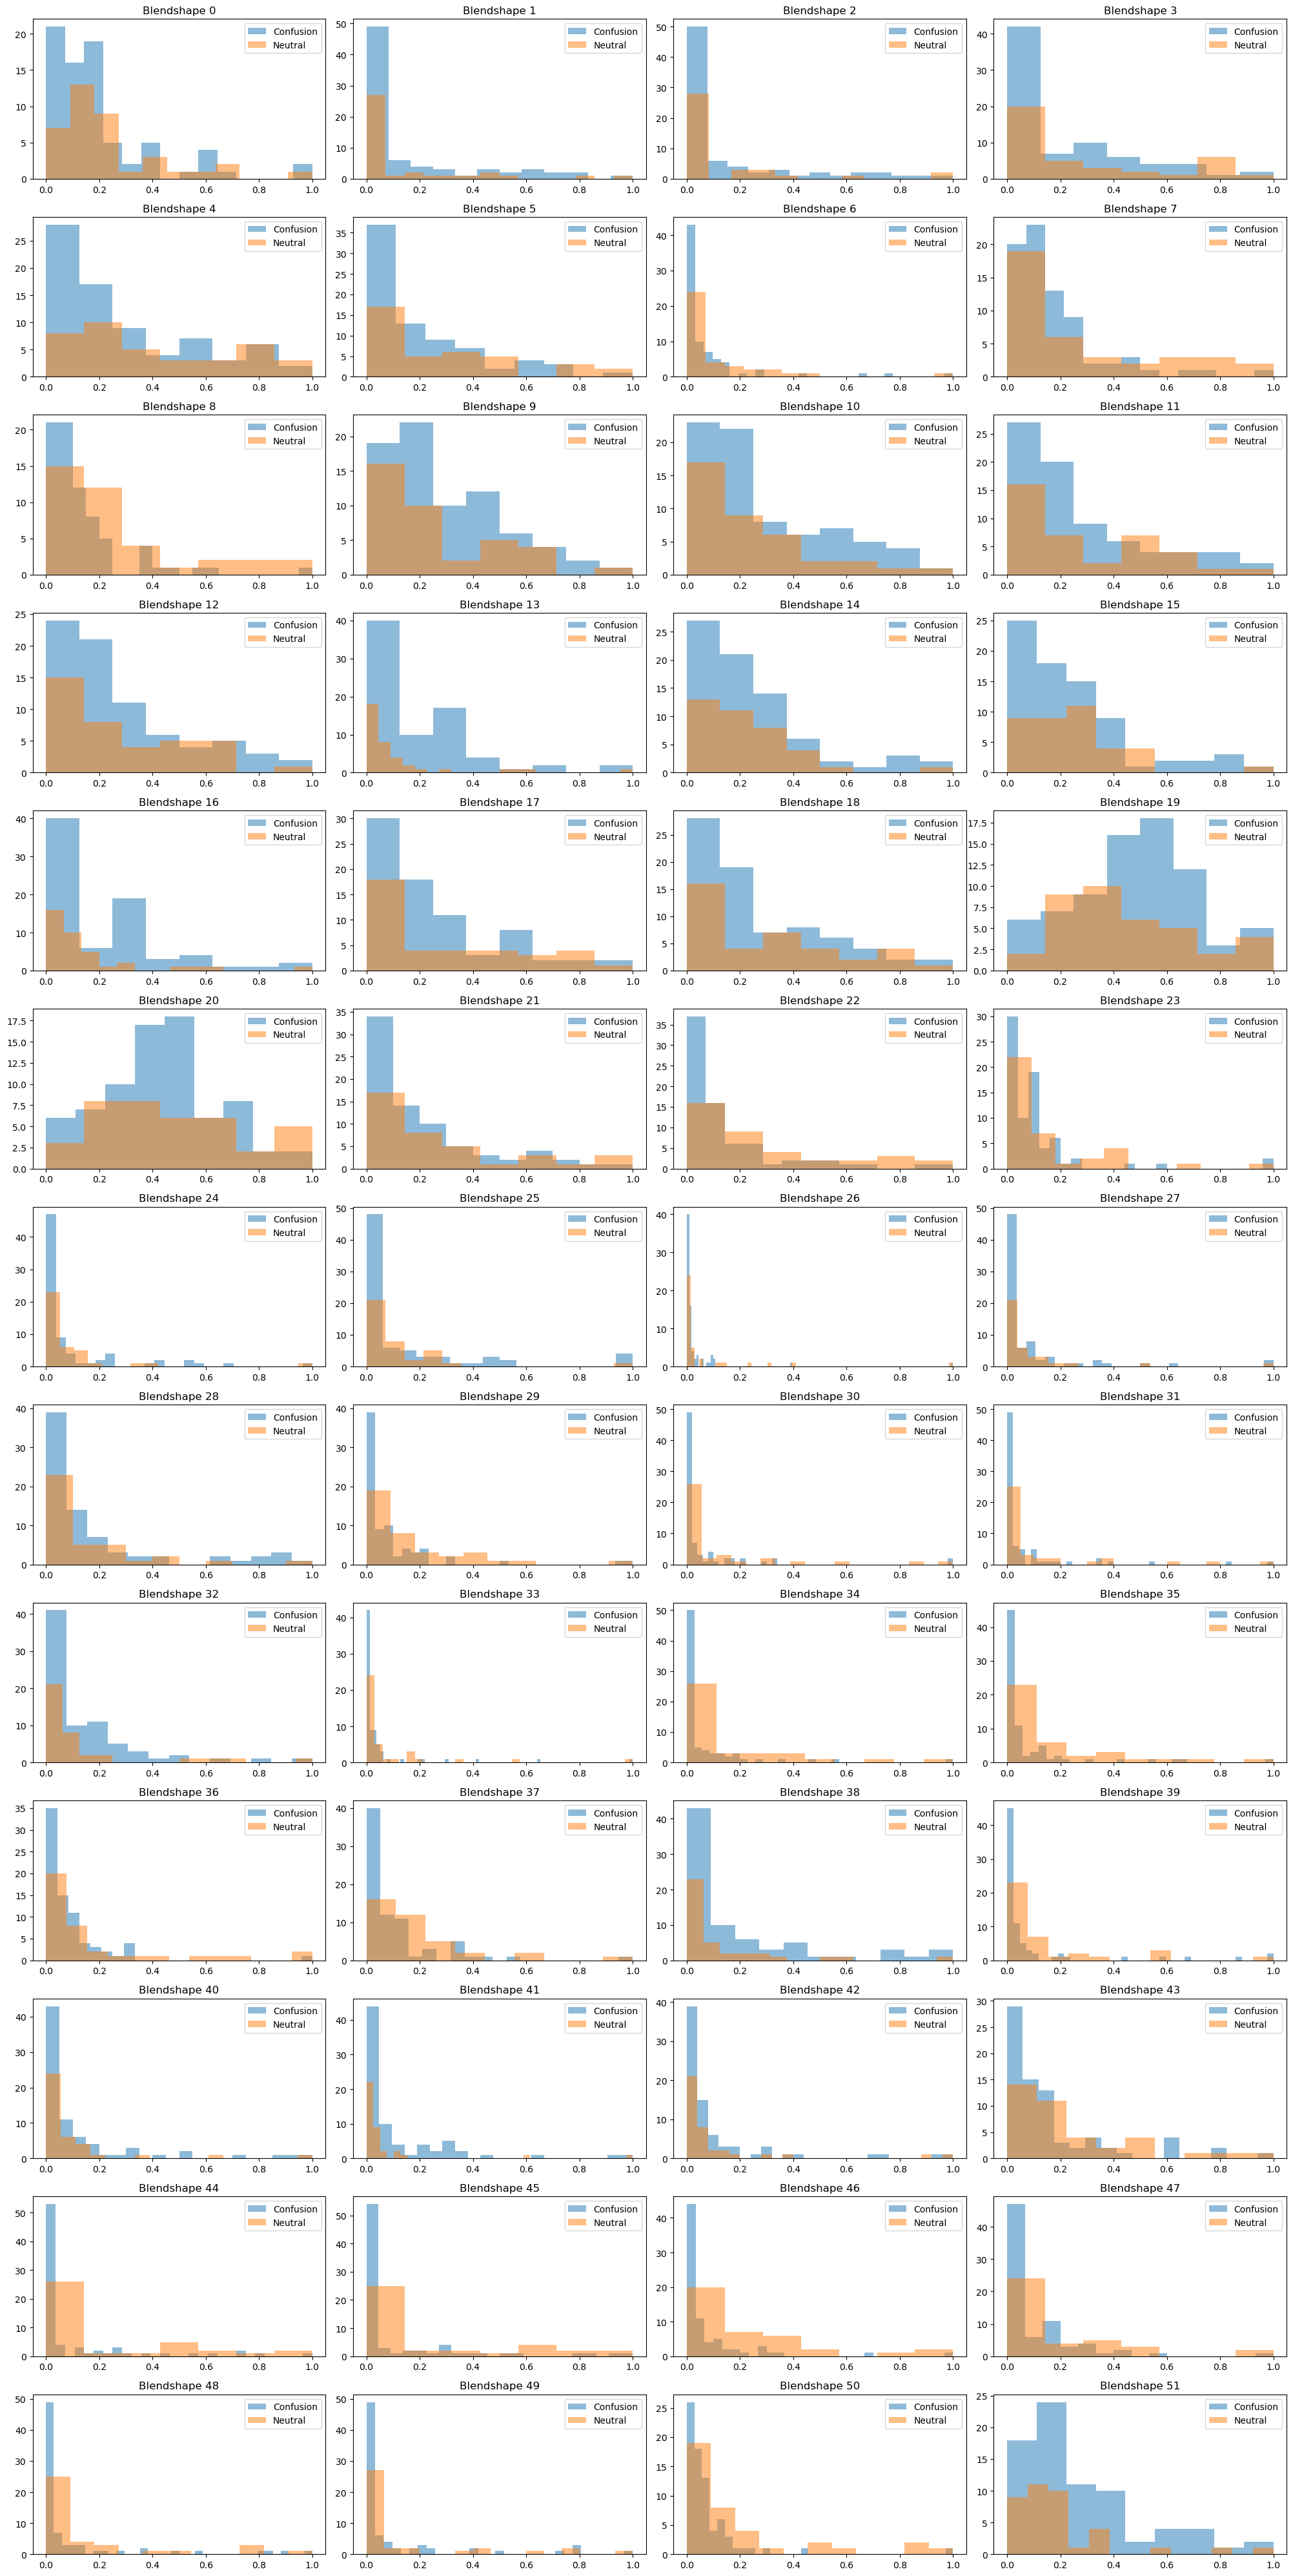

In [12]:
bins = 'auto'

fig, axs = plt.subplots(13, 4, figsize=(20, 40))  # Adjust the figure size as needed
axs = axs.flatten()

for i in range(52):
    # Plotting both categories in the same histogram for each blendshape
    axs[i].hist(blendshape_data_0[i], bins=bins, alpha=0.5, label='Confusion')
    axs[i].hist(blendshape_data_1[i], bins=bins, alpha=0.5, label='Neutral')
    axs[i].set_title(f"Blendshape {i}")
    axs[i].legend()

plt.tight_layout()
plt.show()

In [34]:
from scipy.stats import shapiro

# Not normally distributed if pvalue < 0.05
for i in range(52):
    print(f"Blendshape {i}: Confusion {shapiro(blendshape_data_0[i]).pvalue:.4f}, \tNeutral {shapiro(blendshape_data_1[i]).pvalue:.4f}")

Blendshape 0: Confusion 0.0000, 	Neutral 0.0000
Blendshape 1: Confusion 0.0000, 	Neutral 0.0000
Blendshape 2: Confusion 0.0000, 	Neutral 0.0000
Blendshape 3: Confusion 0.0000, 	Neutral 0.0000
Blendshape 4: Confusion 0.0000, 	Neutral 0.0217
Blendshape 5: Confusion 0.0000, 	Neutral 0.0003
Blendshape 6: Confusion 0.0000, 	Neutral 0.0000
Blendshape 7: Confusion 0.0000, 	Neutral 0.0000
Blendshape 8: Confusion 0.0000, 	Neutral 0.0000
Blendshape 9: Confusion 0.0001, 	Neutral 0.0002
Blendshape 10: Confusion 0.0000, 	Neutral 0.0002
Blendshape 11: Confusion 0.0000, 	Neutral 0.0019
Blendshape 12: Confusion 0.0000, 	Neutral 0.0024
Blendshape 13: Confusion 0.0000, 	Neutral 0.0000
Blendshape 14: Confusion 0.0000, 	Neutral 0.0001
Blendshape 15: Confusion 0.0000, 	Neutral 0.0003
Blendshape 16: Confusion 0.0000, 	Neutral 0.0000
Blendshape 17: Confusion 0.0000, 	Neutral 0.0004
Blendshape 18: Confusion 0.0000, 	Neutral 0.0010
Blendshape 19: Confusion 0.5348, 	Neutral 0.2509
Blendshape 20: Confusion 0.353

In [37]:
from scipy.stats import mannwhitneyu

# If p-value smaller than 0.05 => reject null hypothesis
significance = 0.05

for i in range(52):
    p_value = mannwhitneyu(blendshape_data_0[i], blendshape_data_1[i]).pvalue
    if p_value < significance:
        print(f"Blendshape {i}: {mannwhitneyu(blendshape_data_0[i], blendshape_data_1[i]).pvalue}")

Blendshape 4: 0.04499854839424939
Blendshape 8: 0.0022839846597277197
Blendshape 22: 0.00754256217724114
Blendshape 29: 0.0024737189614555065
Blendshape 30: 0.04248763035400864
Blendshape 36: 0.032119442534551526
Blendshape 37: 0.021493189876750526
Blendshape 38: 0.040096245945534244
Blendshape 39: 0.03163979094909378
Blendshape 41: 0.016332743012067316
Blendshape 46: 0.002238681821073671
Blendshape 50: 0.008695460284795647
Blendshape 51: 0.01479085339621562


In [37]:
from scipy.stats import mannwhitneyu, norm
import numpy as np

# https://datatab.net/tutorial/mann-whitney-u-test
# effect size r less than 0.3 → small effect
# effect size r between 0.3 and 0.5 → medium effect
# effect size r greater than 0.5 → large effect

# Assuming blendshape_data_0 and blendshape_data_1 are available
significance = 0.05

for i in range(52):
    # Perform the Mann-Whitney U test
    result = mannwhitneyu(blendshape_data_0[i], blendshape_data_1[i])
    p_value = result.pvalue
    U = result.statistic
    n1 = len(blendshape_data_0[i])
    n2 = len(blendshape_data_1[i])
    
    if p_value < significance:
        # Calculate the rank-biserial correlation as an effect size
        effect_size = 1 - (2*U) / (n1*n2)
        
        # Calculate the z-score for the U statistic
        z = (U - (n1*n2/2)) / np.sqrt(n1*n2*(n1+n2+1)/12) # http://statisticslectures.com/topics/mannwhitneyu/
        effect_size = z / np.sqrt(n1+n2) # https://www.researchgate.net/post/How_can_i_calculate_Effect_Size_for_Mann_Whitney_U_test
        # Fritz, C. O., Morris, P. E., & Richler, J. J. (2012). Effect size estimates: Current use, calculations, and interpretation. Journal of Experimental Psychology: General, 141(1), 2–18. https://doi.org/10.1037/a0024338
        
        # Calculate the 95% confidence interval for the z-score
        z_critical = norm.ppf(1 - significance/2) # two-tailed test
        margin_of_error = z_critical * np.sqrt(1/(n1*n2))
        
        # Convert z-score confidence interval back to U statistic range
        U_conf_low = (z - margin_of_error) * np.sqrt(n1*n2*(n1+n2+1)/12) + (n1*n2/2)
        U_conf_high = (z + margin_of_error) * np.sqrt(n1*n2*(n1+n2+1)/12) + (n1*n2/2)
        
        if effect_size >= 0.2:
            print(f"Blendshape {i}: p-value={p_value:.4e}, effect size={effect_size:.4f} "
                  f"U confidence interval=({U_conf_low:.4f}, {U_conf_high:.4f})")


Blendshape 41: p-value=1.6333e-02, effect size=0.2252 U confidence interval=(1837.9325, 1850.0675)
Blendshape 51: p-value=1.4791e-02, effect size=0.2286 U confidence interval=(1843.9325, 1856.0675)


In [3]:
for i in [41, 51]:
    print(BLENDNAMES[i])

mouthRollUpper
noseSneerRight


In [4]:
for i in [4, 8, 22, 29, 30, 36, 37, 38, 39, 41, 46, 50, 51]:
    print(BLENDNAMES[i])

browOuterUpLeft
cheekSquintRight
eyeWideRight
mouthDimpleRight
mouthFrownLeft
mouthPressLeft
mouthPressRight
mouthPucker
mouthRight
mouthRollUpper
mouthStretchLeft
noseSneerLeft
noseSneerRight
